# Consolidación de Modelos

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Archivos resultado distancias
result_dist_out = pd.read_csv('outliers.csv',index_col=0)
result_dist_no_out = pd.read_csv('base_distancia_limpia.csv',index_col=0)

In [18]:
#Unicar archivos
result_combined_dist = pd.concat([result_dist_out, result_dist_no_out])


In [12]:
#Archivos resultado KNN
result_knn_out = pd.read_csv('final_data_outliers.csv',index_col=0)
result_knn_no_out = pd.read_csv('final_data_sin_outliers.csv',index_col=0)

In [15]:
result_combined_knn = pd.concat([result_knn_out, result_knn_no_out])

In [92]:
final_combined = pd.concat([result_combined_dist, result_combined_knn], axis=1)

In [95]:
#Identificar atipicos en ambos modelos
atipicos_urgen = final_combined[(final_combined['reconfirma'] == False) & (final_combined['outlier_best_knn'] == True)]

In [97]:
conditions = [
    (final_combined['reconfirma'] == False) & (final_combined['outlier_best_knn'] == True),
    (final_combined['reconfirma'] == False),
    (final_combined['outlier_best_knn'] == True)
]

In [98]:
# Definir los valores correspondientes a las condiciones
values = ['Outlier urgente', 'Outlier importante', 'Otro outlier']


In [99]:
final_combined['marcación'] = np.select(conditions, values, default='No Outlier')

In [124]:
category_counts = final_combined['marcación'].value_counts()
category_counts

marcación
No Outlier            559567
Otro outlier           35362
Outlier importante      5489
Outlier urgente          355
Name: count, dtype: int64

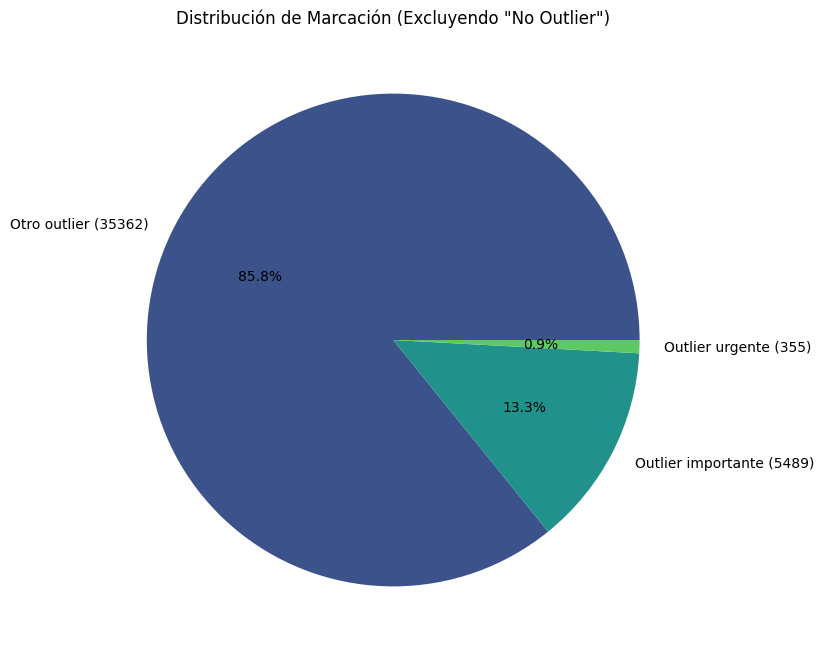

In [102]:

# Filtrar los datos para excluir la categoría 'No Outlier'
filtered_df = final_combined[final_combined['marcación'] != 'No Outlier']

# Contar la frecuencia de cada categoría en la columna 'marcación'
category_counts = filtered_df['marcación'].value_counts()

# Crear las etiquetas que muestren el porcentaje y el número absoluto
labels = [f'{cat} ({count})' for cat, count in zip(category_counts.index, category_counts.values)]

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(category_counts)))
plt.title('Distribución de Marcación (Excluyendo "No Outlier")')
plt.show()


In [123]:
# Crear una tabla de frecuencia cruzada para contar las categorías por 'nivel_1_cuenta' y 'marcación'
counts = pd.crosstab(final_combined['nivel_1_cuenta'], final_combined['marcación'])
counts

marcación,No Outlier,Otro outlier,Outlier importante,Outlier urgente
nivel_1_cuenta,,,,
Actividades Fiduciarias,512,0,4,0
Adecuación E Instalación,11689,612,97,4
Adecuación E Instalación Otras,3,0,0,0
Aportes A La Seguridad Social,30354,1395,93,11
Arrendamientos,10247,24,44,0
Asesoría Financiera,6,0,0,0
Asesoría Jurídica,376,0,3,0
Bonificaciones,3386,53,35,2
Cesantias E Intereses A Las Cesantías,12679,2,63,0


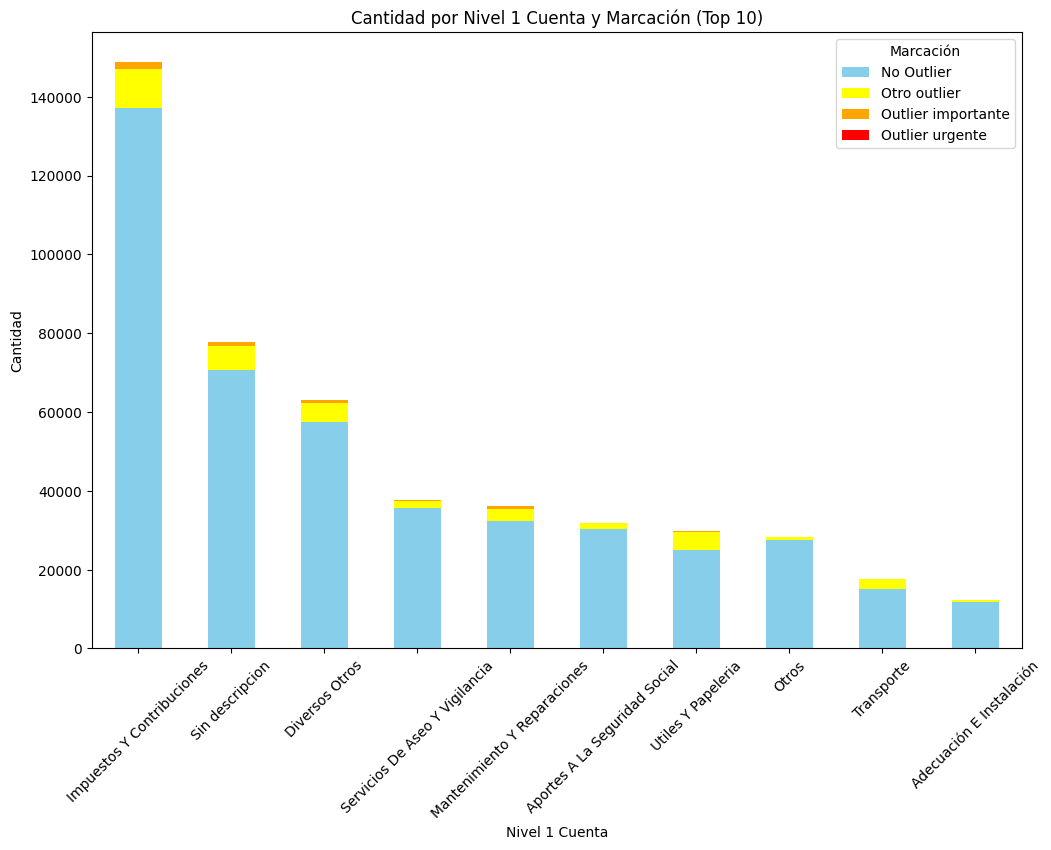

In [122]:
# Crear una tabla de frecuencia cruzada para contar las categorías por 'nivel_1_cuenta' y 'marcación'
counts = pd.crosstab(final_combined['nivel_1_cuenta'], final_combined['marcación'])

# Filtrar para obtener solo los nivel_1_cuenta que tienen todas las marcaciones con valores mayores que 0
required_categories = ['No Outlier', 'Otro outlier', 'Outlier importante', 'Outlier urgente']
filtered_counts = counts.loc[(counts[required_categories] > 0).all(axis=1)]

# Ordenar los datos por la suma de las filas y seleccionar los primeros 10
top_counts = filtered_counts.sum(axis=1).nlargest(10).index
top_counts = filtered_counts.loc[top_counts]

# Definir los colores para las categorías
colors = {
    'No Outlier': 'skyblue',
    'Otro outlier': 'yellow',
    'Outlier importante': 'orange',
    'Outlier urgente': 'red'
}

# Crear el gráfico de barras apiladas
top_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors[col] for col in top_counts.columns])

# Añadir títulos y etiquetas
plt.title('Cantidad por Nivel 1 Cuenta y Marcación (Top 10)')
plt.xlabel('Nivel 1 Cuenta')
plt.ylabel('Cantidad')
plt.legend(title='Marcación')
plt.xticks(rotation=45)

plt.show()

In [125]:
result_final = final_combined.to_csv('Base_marcaciones.csv')